___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [14]:
import sys
!{sys.executable} -m pip install numpy tensorflow wandb

import wandb
import matplotlib.pyplot as plt

import sys
!{sys.executable} -m pip install numpy tensorflow
from IPython.display import clear_output
clear_output()
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [15]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [22]:
print("No. images in training set {}".format(x_train.shape))
print("No. labels in training set {}".format(y_train.shape))
print("No. images in test set {}".format(x_test.shape))
print("No. labels in test set {}".format(y_train.shape))

No. images in training set (60000, 28, 28)
No. labels in training set (60000,)
No. images in test set (10000, 28, 28)
No. labels in test set (60000,)


In [17]:
classes = np.unique(y_train)
num_classes = len(classes)
print('Number of classes: ', num_classes)
print('Classes : ', classes)

Number of classes:  10
Classes :  [0 1 2 3 4 5 6 7 8 9]


**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [18]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

Sample 97 is number Trouser


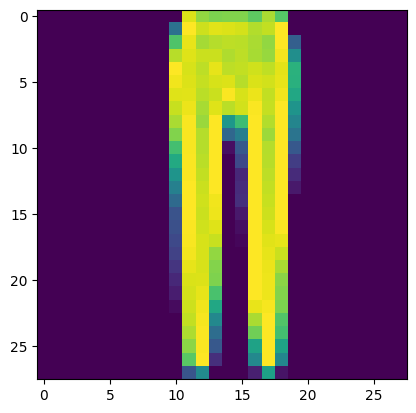

In [19]:
i = 97
print(f"Sample {i} is number {classes[y_train[i]]}")
plt.imshow(x_train[i]);

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [24]:
import tensorflow as tf

In [25]:
x_train, x_test = tf.cast(x_train/255.0, tf.float32), tf.cast(x_test/255.0, tf.float32)


In [26]:
model = tf.keras.models.Sequential()

In [27]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))
model.build(input_shape=[None, 28, 28])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [30]:
import tensorflow as tf
x_train = tf.reshape(x_train, (x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = tf.reshape(x_test, (x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))


**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [33]:
from tensorflow.keras.utils import to_categorical

classes = 10

y_train_one_hot = to_categorical(y_train, classes)
y_test_one_hot = to_categorical(y_test, classes)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [34]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [35]:
model.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 0.7102 - accuracy: 0.7661
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4840 - accuracy: 0.8321
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4379 - accuracy: 0.8469
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4103 - accuracy: 0.8562
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3896 - accuracy: 0.8628
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3724 - accuracy: 0.8684
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3598 - accuracy: 0.8741
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3480 - accuracy: 0.8761
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3384 - accuracy: 0.8803
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.329

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))


model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(x_train, y_train, validation_split=0.2, batch_size=32, epochs=100, callbacks=[early_stopping])

Epoch 1/100
1500/1500 [==============================] - 4s 2ms/step - loss: 0.7643 - accuracy: 0.7468 - val_loss: 0.5314 - val_accuracy: 0.8198
Epoch 2/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5048 - accuracy: 0.8257 - val_loss: 0.4880 - val_accuracy: 0.8292
Epoch 3/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4567 - accuracy: 0.8414 - val_loss: 0.4513 - val_accuracy: 0.8394
Epoch 4/100
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4260 - accuracy: 0.8519 - val_loss: 0.4303 - val_accuracy: 0.8463
Epoch 5/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4074 - accuracy: 0.8578 - val_loss: 0.4284 - val_accuracy: 0.8501
Epoch 6/100
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3890 - accuracy: 0.8638 - val_loss: 0.3958 - val_accuracy: 0.8592
Epoch 7/100
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3758 - accuracy: 0.8667 - val_loss: 0.3891 - val_ac

**TASK 7: Plot values of metrics you used in your model.**

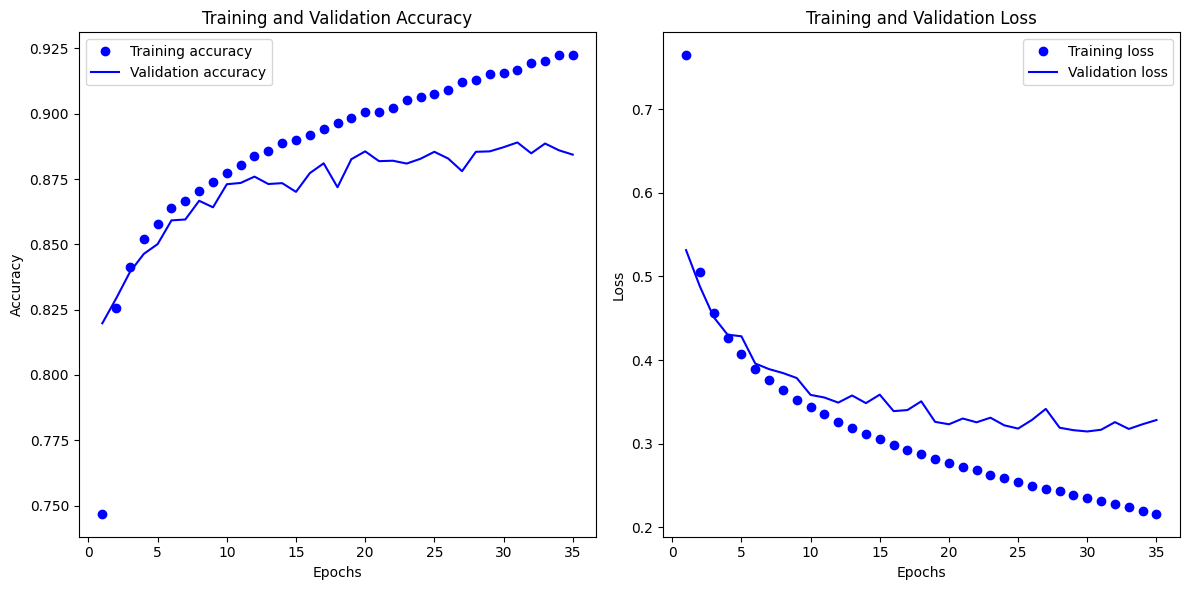

In [37]:
# Access the training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [39]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3406 - accuracy: 0.8803


[0.34059953689575195, 0.880299985408783]

In [40]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
report = classification_report(y_test, y_pred_classes)

print(report)

313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.84      0.74      0.79      1000
           3       0.87      0.89      0.88      1000
           4       0.74      0.88      0.81      1000
           5       0.96      0.96      0.96      1000
           6       0.71      0.69      0.70      1000
           7       0.93      0.95      0.94      1000
           8       0.96      0.97      0.96      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



## Prediction

In [45]:
probability_model = tf.keras.Sequential([model,  tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


1/1 [==============================] - 0s 14ms/step


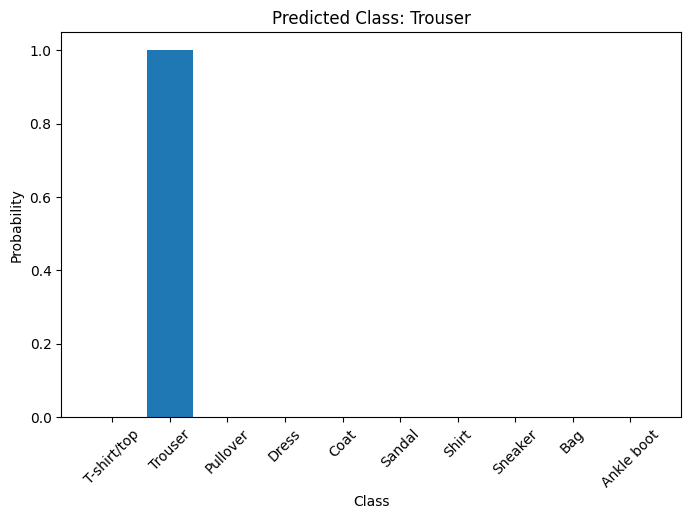

In [48]:
predictions = model.predict(x_test[3:4])
#List of class names
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
predicted_class = classes[np.argmax(predictions)]

# Bar chart to display the probabilities
plt.figure(figsize=(8, 5))
plt.bar(classes, predictions[0])
plt.xlabel('Class')
plt.ylabel('Probability')
plt.title(f'Predicted Class: {predicted_class}')
plt.xticks(rotation=45)

plt.show()

Sample 97 is number Trouser


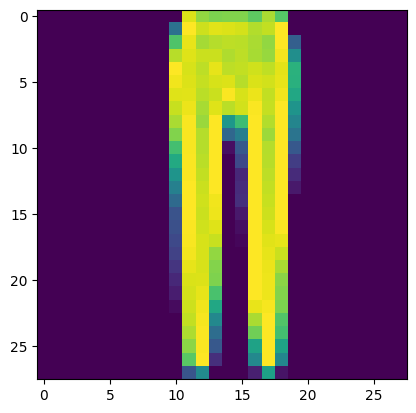

In [49]:
i = 97
print(f"Sample {i} is number {classes[y_train[i]]}")
plt.imshow(x_train[i]);

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___